In [76]:
%matplotlib inline
from ggplot import *
import pandas as pd
from altair import *

In [77]:
hd = pd.read_csv('hd2014.csv', encoding = 'ISO-8859-1')
ic = pd.read_csv('sfa1314.csv', encoding = 'ISO-8859-1')

In [78]:
hd.head()

,UNITID,INSTNM,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,...,F1SYSTYP,F1SYSNAM,F1SYSCOD,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100636,Community College of the Air Force,100 S Turner Blvd,Montgomery,AL,36114-3011,1,0,Michael Artelli,Commandant,...,-1,,-1,1101,Montgomery,102,-86.244548,32.406138,-1,-1
1,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",President,...,2,,-2,1089,Madison,105,-86.568502,34.783368,131,1
2,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,President,...,1,The University of Alabama System,101050,1073,Jefferson,107,-86.809170,33.502230,119,1
3,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael Turner,President,...,2,,-2,1101,Montgomery,102,-86.174010,32.362609,232,2
4,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Robert A. Altenkirch,President,...,1,The University of Alabama System,101050,1089,Madison,105,-86.638420,34.722818,119,2


In [79]:
sfa.head()

,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,100654,R,4051,R,1066,R,26,R,4051.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,100663,R,11542,R,1732,R,15,R,11542.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
2,100690,R,322,R,3,R,1,R,322.0,R,...,R,6332.0,R,8364.0,A,NaN,A,NaN,A,NaN
3,100706,R,5696,R,638,R,11,R,5696.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
4,100724,R,5356,R,1520,R,28,R,5356.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN


In [80]:
hd = hd[(hd.STABBR=='MN') | (hd.STABBR=='IA')]

In [81]:
affordability = pd.merge(hd, sfa, left_on="UNITID", right_on="UNITID")
affordability.head()

,UNITID,INSTNM,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,125231,Walden University,"100 Washington Avenue South, Suite 900",Minneapolis,MN,55401,27,4,Cynthia Baum,President,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,152798,Allen College,1990 Heath St,Waterloo,IA,50703-1999,19,4,Jerry Durham,Chancellor,...,A,NaN,A,NaN,A,NaN,R,26946.0,A,NaN
2,152822,AIB College of Business,2500 Fleur Drive,Des Moines,IA,50321-1799,19,4,Nancy Williams,President,...,R,10877.0,R,8290.0,R,12350.0,R,13941.0,R,17068.0
3,152992,Briar Cliff University,3303 Rebecca Street,Sioux City,IA,51104,19,4,Beverly Wharton,President,...,R,15229.0,R,17191.0,R,18740.0,R,20689.0,R,20142.0
4,153001,Buena Vista University,610 W 4th St,Storm Lake,IA,50588,19,4,Frederick V Moore,President,...,R,15482.0,R,15095.0,R,16855.0,R,18280.0,R,20188.0


In [82]:
toGraph = affordability[['INSTNM', 'NPGRN2']]
toGraph.columns = ['Name', 'Tuition']
toGraph.head()

,Name,Tuition
0,Walden University,27851.0
1,Allen College,6953.0
2,AIB College of Business,12440.0
3,Briar Cliff University,19271.0
4,Buena Vista University,19264.0


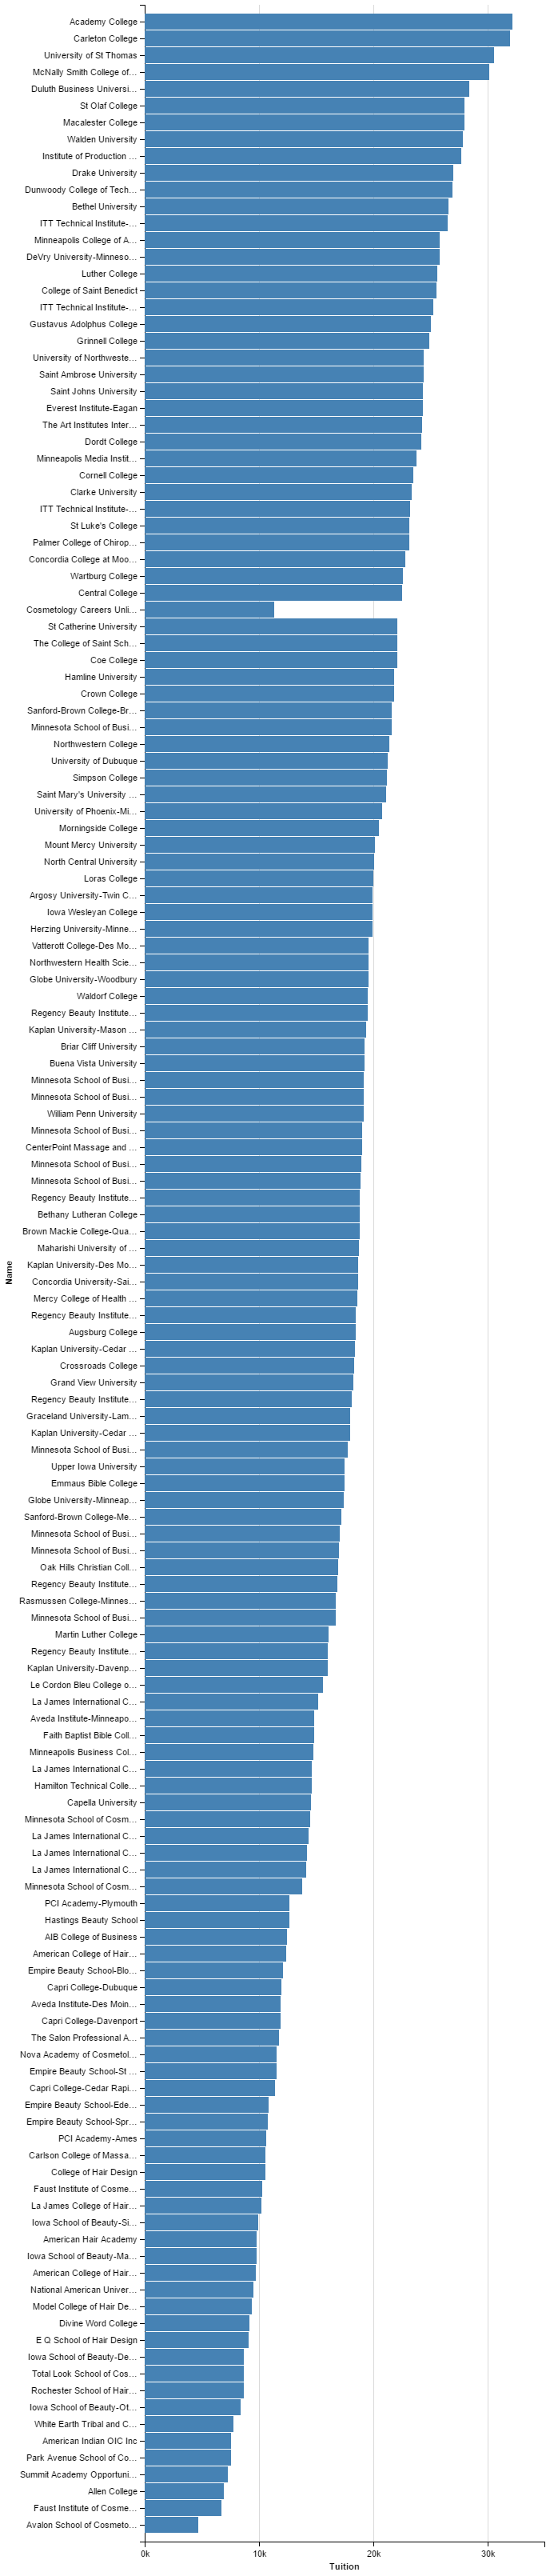

In [83]:
Chart(toGraph).mark_bar().encode(
    x=X('Tuition'), 
    y=Y('Name', sort=SortField(field='Tuition',order='descending',op='sum'))
    )